In [ ]:
from pathlib import Path
import pandas as pd
import urllib.request
from fiweps.data import d_urls
import numpy as npy
import sys
import re
import datetime as dt

In [ ]:
PROJPATH = Path().resolve().parent
sys.path.append((PROJPATH / 'scripts').as_posix())
import riverice_util as ru

predictordir  = PROJPATH / "data/predictors"
fiwepsdir = Path("/Volumes/CWMobileSSD/DataProjects/Ongoing/preseason_predictors/incoming/teleconnections")

### Load per huc data

In [ ]:
pat = re.compile(' nr | at ')

In [ ]:
lochuc_fn = PROJPATH / "data/breakupdata/derived/breakupDate_mean_std_HUC.csv"
huctable = pd.read_csv(lochuc_fn)
huctable[['river', 'locality']] = huctable.siteID.str.split(pat, n=1, expand=True)
huctable['mean_date'] = (dt.datetime(2001, 3, 1, 12) + pd.to_timedelta(huctable['mean'], unit='d')).dt.strftime('%m-%d')
huctable.drop(columns=['fid', 'field_1'], inplace=True)
huctable

,siteID,mean,std,lat,lon,objectid,huc6,name,river,locality,mean_date
0,Gakona River at Gakona,59.235294,10.476695,62.305650,-145.285421,1,190201,Copper River,Gakona River,Gakona,04-29
1,Gulkana River nr Gakona,58.484848,9.421124,62.299913,-145.370357,1,190201,Copper River,Gulkana River,Gakona,04-28
2,Yukon River at Circle,67.025641,5.787860,65.830226,-144.008404,2,190705,Fortymile River-Yukon River,Yukon River,Circle,05-07
3,Yukon River at Dawson,62.651163,5.079762,64.061648,-139.441616,2,190705,Fortymile River-Yukon River,Yukon River,Dawson,05-03
4,Yukon River at Eagle,62.697674,5.877864,64.789821,-141.196132,2,190705,Fortymile River-Yukon River,Yukon River,Eagle,05-03
5,Yukon River at Fort Yukon,68.102564,5.771048,66.557310,-145.286436,2,190705,Fortymile River-Yukon River,Yukon River,Fort Yukon,05-08
6,Kobuk River at Ambler,75.526316,6.828940,67.084932,-157.851781,5,190503,Kobuk-Selawik Rivers,Kobuk River,Ambler,05-16
7,Kobuk River at Kobuk,73.333333,6.944643,66.907427,-156.889256,5,190503,Kobuk-Selawik Rivers,Kobuk River,Kobuk,05-13
8,Kobuk River at Shungnak,74.812500,7.045646,66.886574,-157.132841,5,190503,Kobuk-Selawik Rivers,Kobuk River,Shungnak,05-15
9,Susitna River at Sunshine,59.411765,6.090816,62.175057,-150.175444,8,190205,Susitna River,Susitna River,Sunshine,04-29


In [ ]:
huctable.to_csv(PROJPATH / "data/breakupdata/derived/breakupDate_mean_std_HUC_augmented.csv")

In [ ]:
huctable_aug = pd.read_csv(PROJPATH / "data/breakupdata/derived/breakupDate_mean_std_HUC_augmented.csv")
huctable_aug.sort_values(['river', 'mean_days'], inplace=True)
huctable_aug

,Unnamed: 0,siteID,mean_days,std_days,lat,lon,objectid,huc6,name,river,locality,mean_date
33,33,Buckland River at Buckland,75.090909,8.326778,65.978508,-161.120656,27,190502,Northern Seward Peninsula,Buckland River,Buckland,05-15
37,37,Chena River at Fairbanks,53.933333,7.574610,64.844761,-147.719989,38,190803,Tanana River,Chena River,Fairbanks,04-24
38,38,Chisana River at Northway,52.812500,5.991594,62.983449,-141.958823,38,190803,Tanana River,Chisana River,Northway,04-23
0,0,Gakona River at Gakona,59.235294,10.476695,62.305650,-145.285421,1,190201,Copper River,Gakona River,Gakona,04-29
1,1,Gulkana River nr Gakona,58.484848,9.421124,62.299913,-145.370357,1,190201,Copper River,Gulkana River,Gakona,04-28
7,7,Kobuk River at Kobuk,73.333333,6.944643,66.907427,-156.889256,5,190503,Kobuk-Selawik Rivers,Kobuk River,Kobuk,05-13
8,8,Kobuk River at Shungnak,74.812500,7.045646,66.886574,-157.132841,5,190503,Kobuk-Selawik Rivers,Kobuk River,Shungnak,05-15
6,6,Kobuk River at Ambler,75.526316,6.828940,67.084932,-157.851781,5,190503,Kobuk-Selawik Rivers,Kobuk River,Ambler,05-16
35,35,Koyukuk River at Bettles,67.439024,6.580459,66.922616,-151.519083,31,190901,Koyukuk River,Koyukuk River,Bettles,05-07
34,34,Koyukuk River at Allakaket,67.888889,6.688061,66.565835,-152.650807,31,190901,Koyukuk River,Koyukuk River,Allakaket,05-08


In [ ]:
huclabelsDF = huctable[['objectid', 'name', 'huc6']].drop_duplicates()
huclabelsDF.to_dict(orient='records')

[{'objectid': 1, 'name': 'Copper River', 'huc6': 190201},
 {'objectid': 2, 'name': 'Fortymile River-Yukon River', 'huc6': 190705},
 {'objectid': 5, 'name': 'Kobuk-Selawik Rivers', 'huc6': 190503},
 {'objectid': 8, 'name': 'Susitna River', 'huc6': 190205},
 {'objectid': 16, 'name': 'Outlet Yukon River', 'huc6': 190903},
 {'objectid': 22, 'name': 'Upper Kuskokwim River', 'huc6': 190304},
 {'objectid': 23, 'name': 'Melozitna River-Yukon River', 'huc6': 190902},
 {'objectid': 24, 'name': 'Lower Kuskokwim River', 'huc6': 190305},
 {'objectid': 27, 'name': 'Northern Seward Peninsula', 'huc6': 190502},
 {'objectid': 31, 'name': 'Koyukuk River', 'huc6': 190901},
 {'objectid': 38, 'name': 'Tanana River', 'huc6': 190803}]

In [ ]:
Tavg_df = pd.read_csv(predictordir / "era5_t2m_by_month_HUC6.csv", index_col=0)
solar_df = pd.read_csv(predictordir / "era5_ssr_by_month_HUC6.csv", index_col=0)
snow_df = pd.read_csv(predictordir / "era5_sd_by_month_HUC6.csv", index_col=0)

snow_df

,hucmask,sd,year,month,objid,huc6
0,1,0.179015,1979,1,1,190201
1,1,0.192401,1979,2,1,190201
2,1,0.252452,1979,3,1,190201
3,1,0.148852,1979,4,1,190201
4,1,0.006074,1979,5,1,190201
...,...,...,...,...,...,...
20629,38,0.033537,2023,11,38,190803
20630,38,0.061380,2023,12,38,190803
20631,38,0.078126,2024,1,38,190803
20632,38,0.087380,2024,2,38,190803


### Plotting

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
sns.set_style('whitegrid')

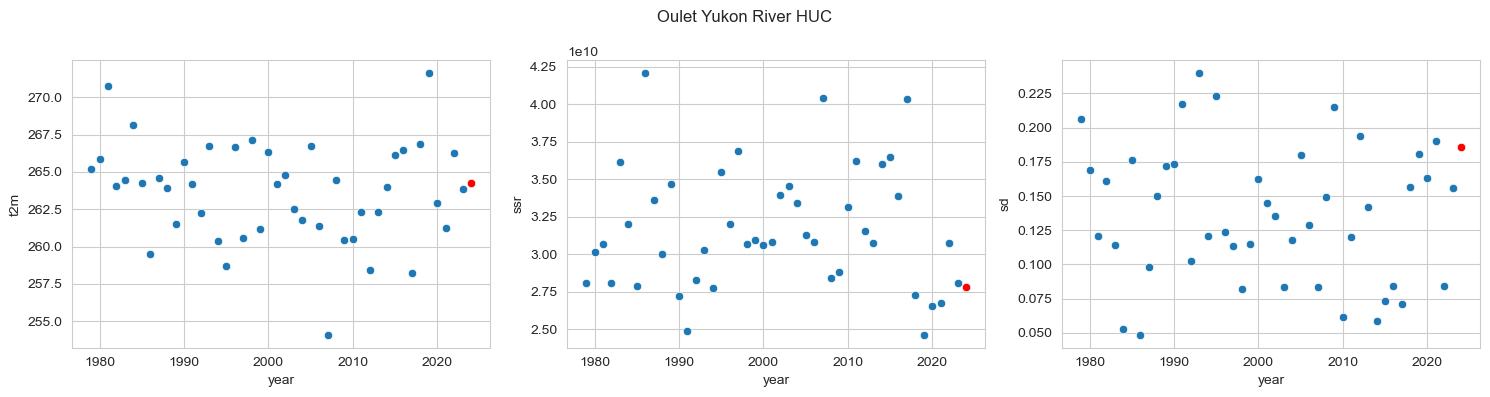

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
sns.scatterplot(data=Tavg_df[(Tavg_df.month==3) & (Tavg_df.objid==22)], x='year', y='t2m', ax=axs[0])
sns.scatterplot(data=Tavg_df[(Tavg_df.month==3) & (Tavg_df.objid==22) & (Tavg_df.year==2024)], x='year', y='t2m', color='red', ax=axs[0])
sns.scatterplot(data=solar_df[(solar_df.month==3) & (solar_df.objid==22)], x='year', y='ssr', ax=axs[1])
sns.scatterplot(data=solar_df[(solar_df.month==3) & (solar_df.objid==22) & (solar_df.year==2024)], x='year', y='ssr', color='red', ax=axs[1])
sns.scatterplot(data=snow_df[(snow_df.month==3) & (snow_df.objid==16)], x='year', y='sd', ax=axs[2])
sns.scatterplot(data=snow_df[(snow_df.month==3) & (snow_df.objid==16) & (snow_df.year==2024)], x='year', y='sd', color='red', ax=axs[2])
fig.suptitle("Oulet Yukon River HUC")
fig.tight_layout()

/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_42374/2175929578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempdata['t2m'] = tempdata.loc[:, ['t2m']].apply((lambda x: (x-x.mean())/ x.std()))
/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_42374/2175929578.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solardata['ssr'] = solardata.loc[:, ['ssr']].apply((lambda x: (x-x.mean())/ x.std()))
/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_42374/2175929578.py:9: Sett

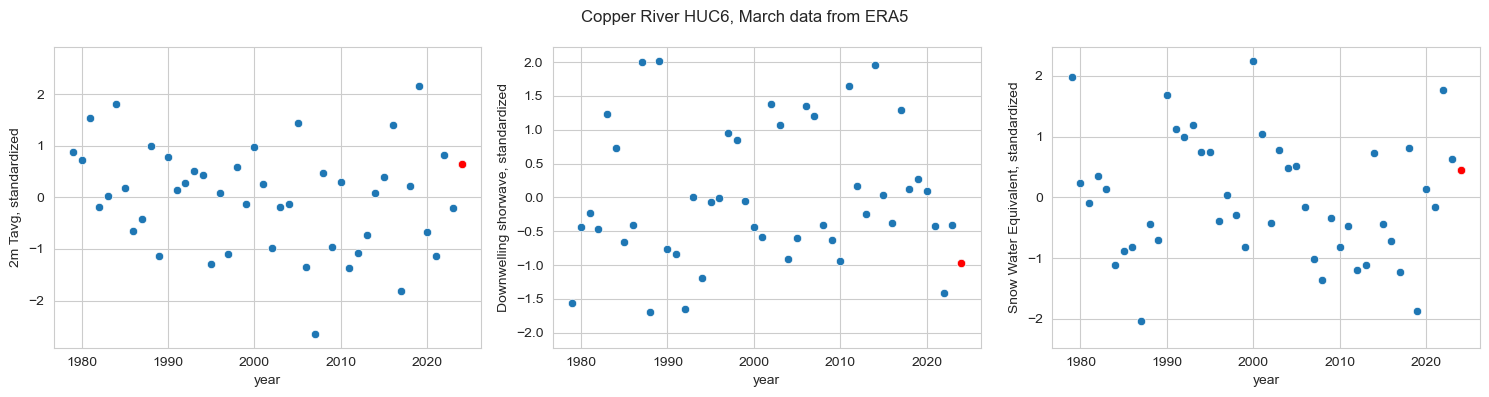

/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_42374/2175929578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempdata['t2m'] = tempdata.loc[:, ['t2m']].apply((lambda x: (x-x.mean())/ x.std()))
/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_42374/2175929578.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solardata['ssr'] = solardata.loc[:, ['ssr']].apply((lambda x: (x-x.mean())/ x.std()))
/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_42374/2175929578.py:9: Sett

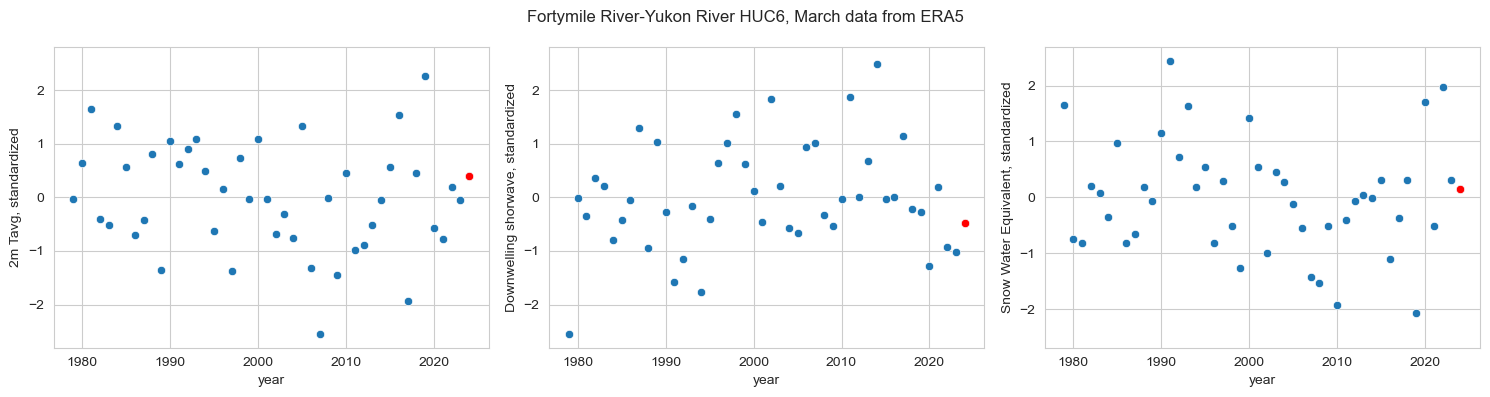

/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_42374/2175929578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempdata['t2m'] = tempdata.loc[:, ['t2m']].apply((lambda x: (x-x.mean())/ x.std()))
/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_42374/2175929578.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solardata['ssr'] = solardata.loc[:, ['ssr']].apply((lambda x: (x-x.mean())/ x.std()))
/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_42374/2175929578.py:9: Sett

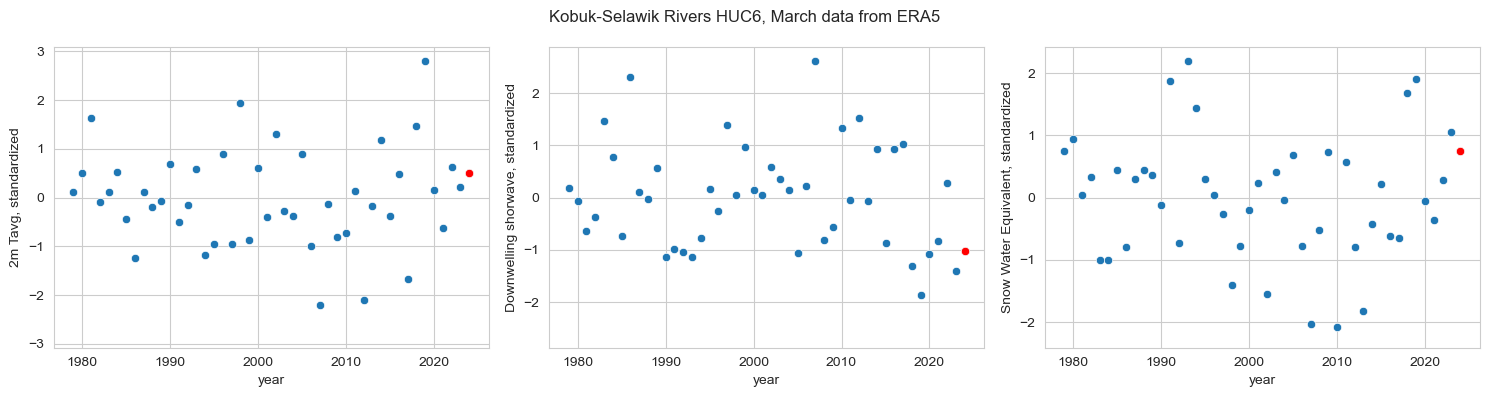

/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_42374/2175929578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempdata['t2m'] = tempdata.loc[:, ['t2m']].apply((lambda x: (x-x.mean())/ x.std()))
/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_42374/2175929578.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solardata['ssr'] = solardata.loc[:, ['ssr']].apply((lambda x: (x-x.mean())/ x.std()))
/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_42374/2175929578.py:9: Sett

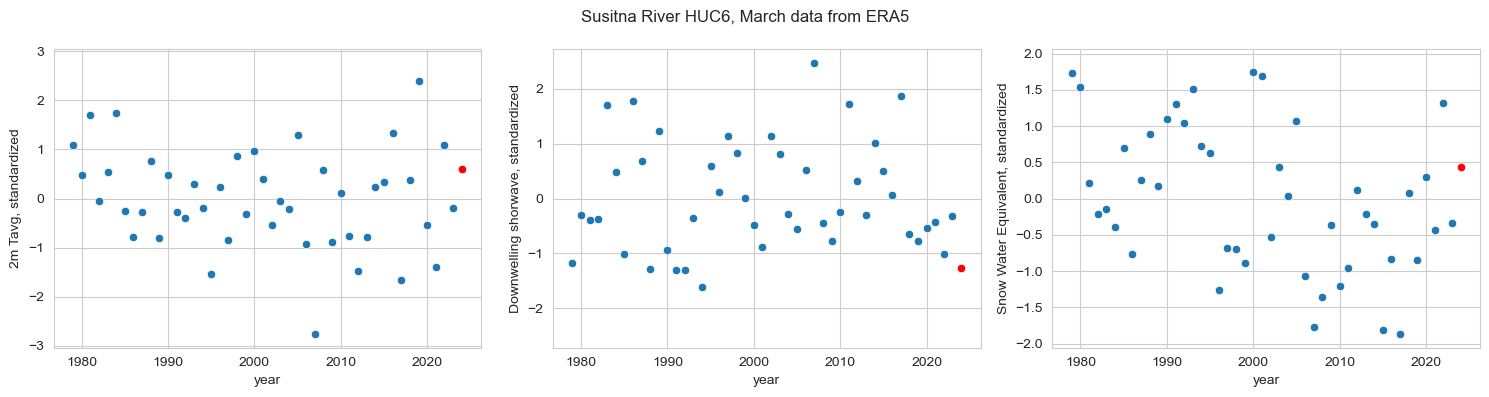

/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_42374/2175929578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempdata['t2m'] = tempdata.loc[:, ['t2m']].apply((lambda x: (x-x.mean())/ x.std()))
/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_42374/2175929578.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solardata['ssr'] = solardata.loc[:, ['ssr']].apply((lambda x: (x-x.mean())/ x.std()))
/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_42374/2175929578.py:9: Sett

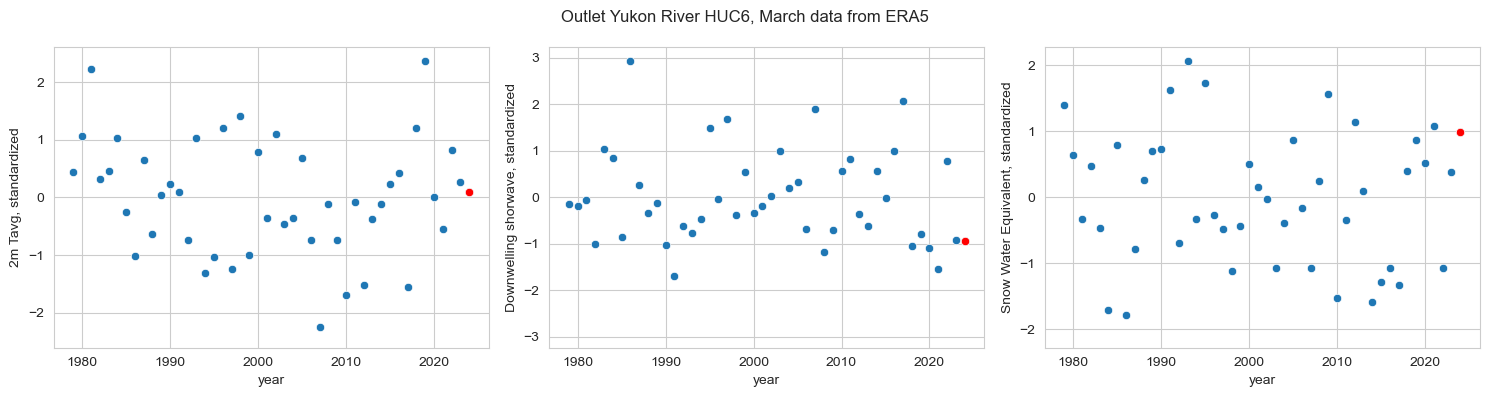

/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_42374/2175929578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempdata['t2m'] = tempdata.loc[:, ['t2m']].apply((lambda x: (x-x.mean())/ x.std()))
/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_42374/2175929578.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solardata['ssr'] = solardata.loc[:, ['ssr']].apply((lambda x: (x-x.mean())/ x.std()))
/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_42374/2175929578.py:9: Sett

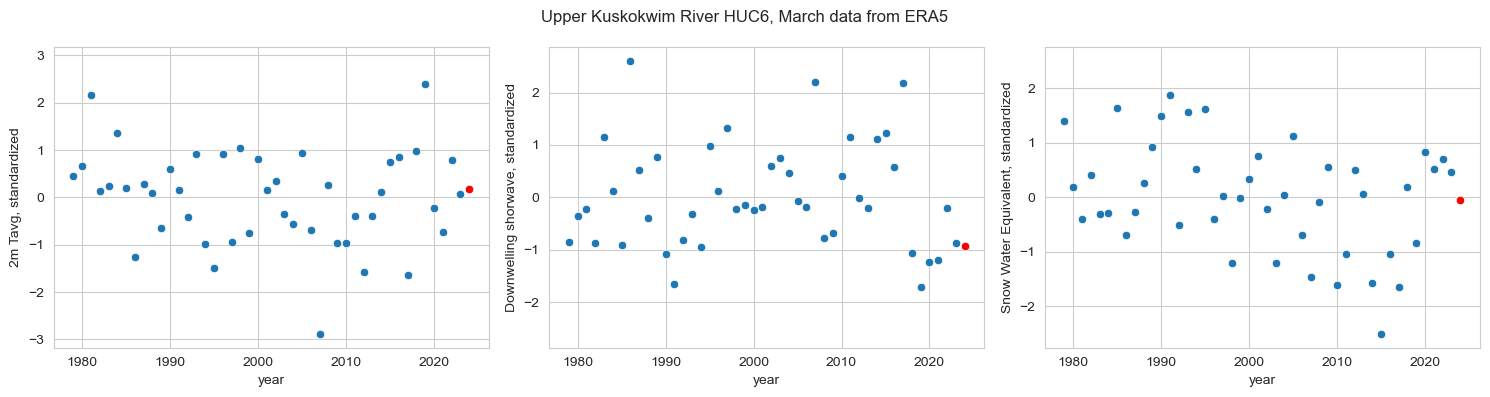

/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_42374/2175929578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempdata['t2m'] = tempdata.loc[:, ['t2m']].apply((lambda x: (x-x.mean())/ x.std()))
/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_42374/2175929578.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solardata['ssr'] = solardata.loc[:, ['ssr']].apply((lambda x: (x-x.mean())/ x.std()))
/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_42374/2175929578.py:9: Sett

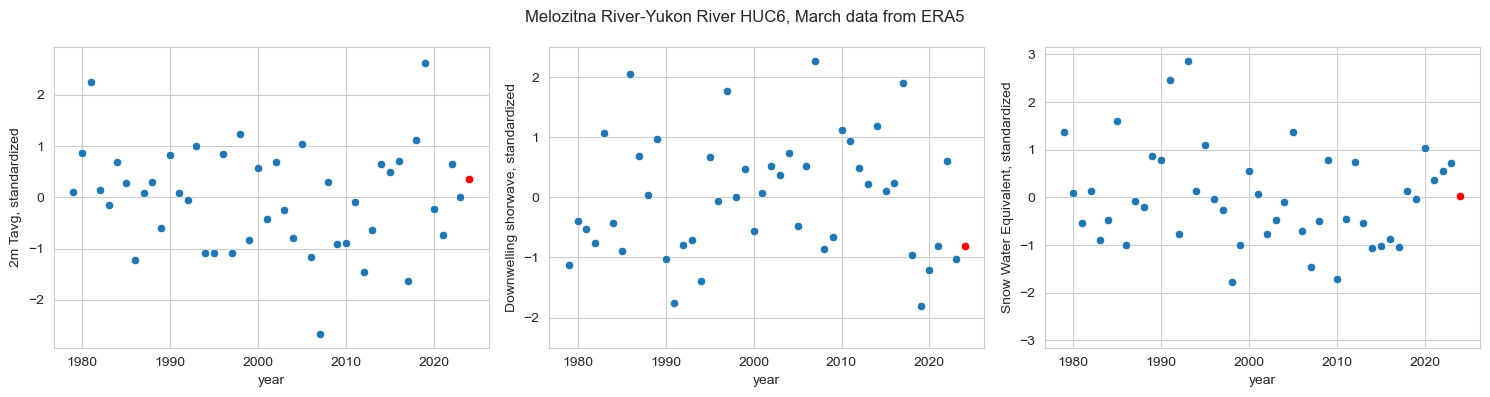

/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_42374/2175929578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempdata['t2m'] = tempdata.loc[:, ['t2m']].apply((lambda x: (x-x.mean())/ x.std()))
/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_42374/2175929578.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solardata['ssr'] = solardata.loc[:, ['ssr']].apply((lambda x: (x-x.mean())/ x.std()))
/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_42374/2175929578.py:9: Sett

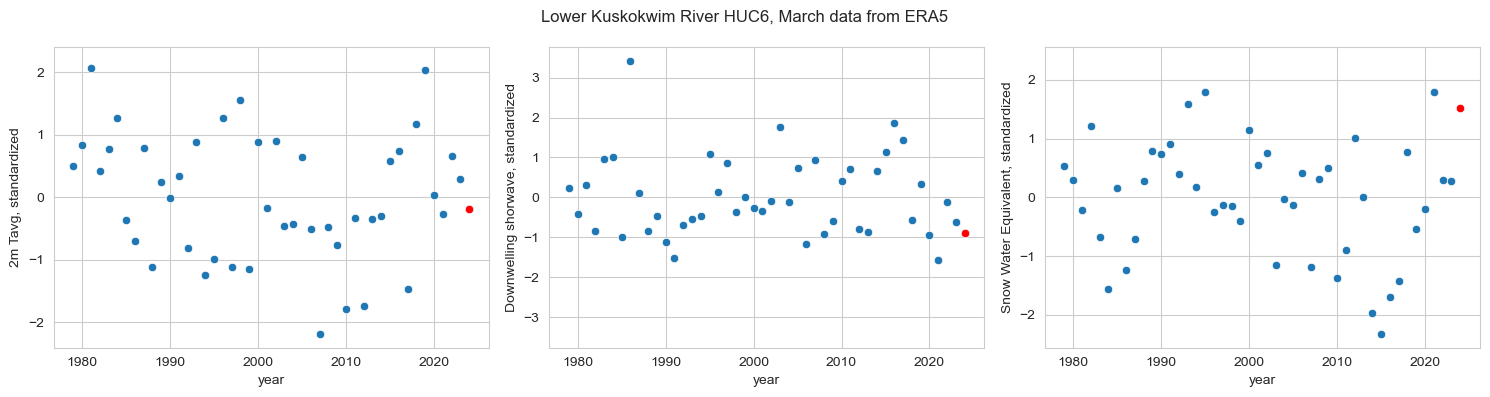

/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_42374/2175929578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempdata['t2m'] = tempdata.loc[:, ['t2m']].apply((lambda x: (x-x.mean())/ x.std()))
/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_42374/2175929578.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solardata['ssr'] = solardata.loc[:, ['ssr']].apply((lambda x: (x-x.mean())/ x.std()))
/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_42374/2175929578.py:9: Sett

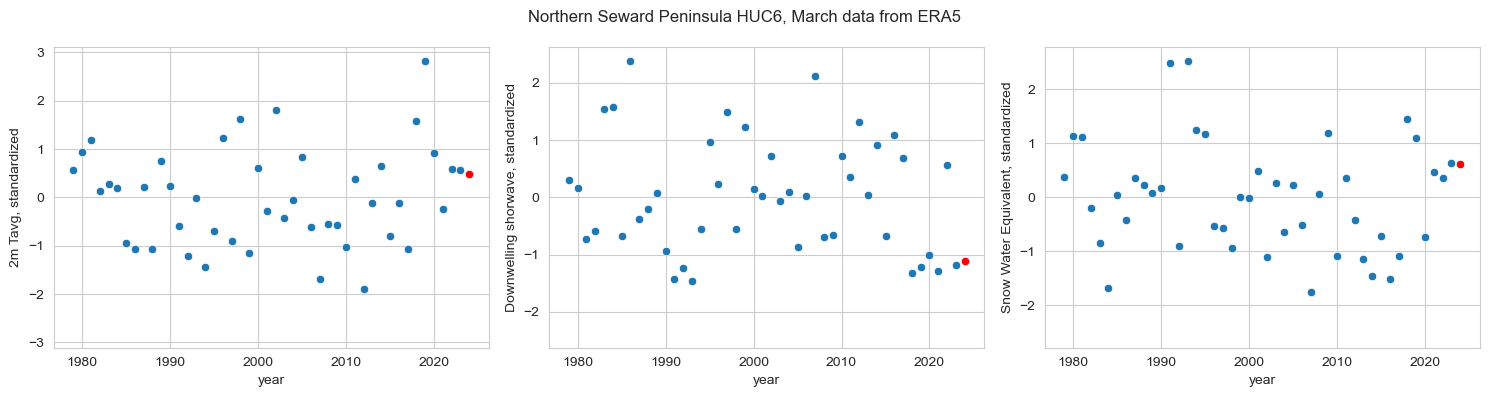

/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_42374/2175929578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempdata['t2m'] = tempdata.loc[:, ['t2m']].apply((lambda x: (x-x.mean())/ x.std()))
/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_42374/2175929578.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solardata['ssr'] = solardata.loc[:, ['ssr']].apply((lambda x: (x-x.mean())/ x.std()))
/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_42374/2175929578.py:9: Sett

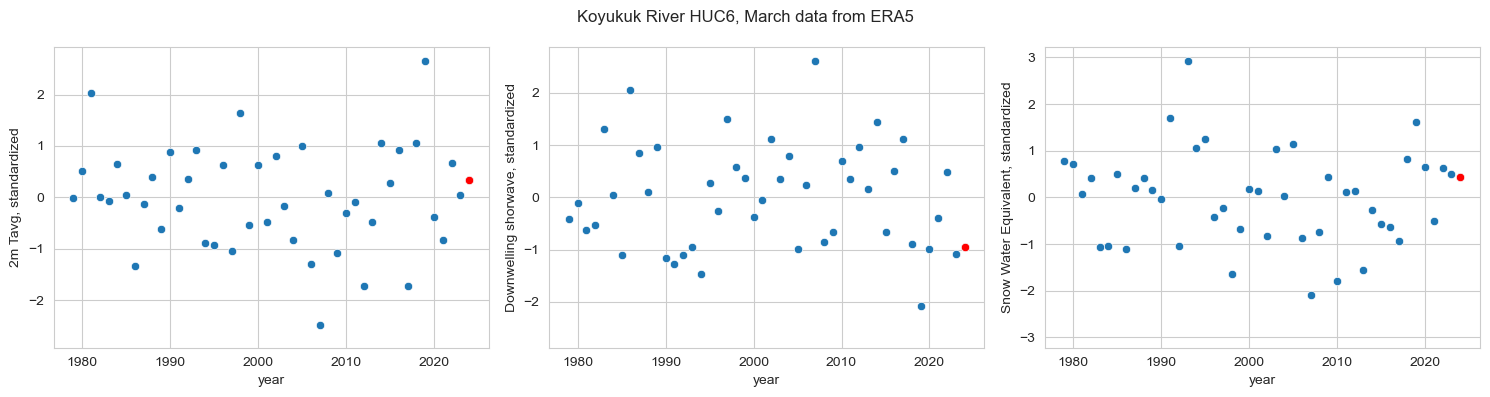

/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_42374/2175929578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempdata['t2m'] = tempdata.loc[:, ['t2m']].apply((lambda x: (x-x.mean())/ x.std()))
/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_42374/2175929578.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solardata['ssr'] = solardata.loc[:, ['ssr']].apply((lambda x: (x-x.mean())/ x.std()))
/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_42374/2175929578.py:9: Sett

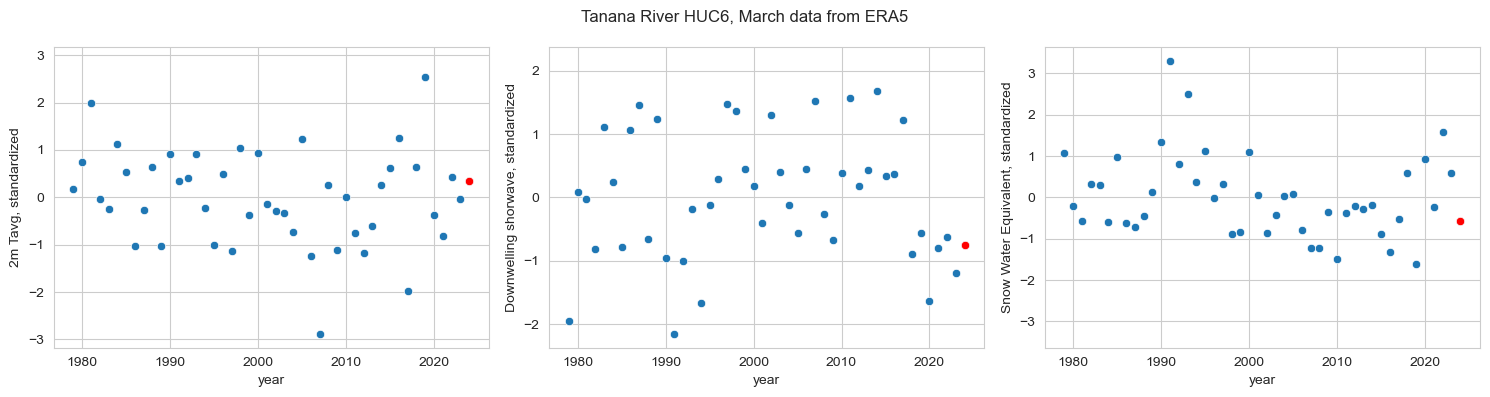

In [ ]:
save_figure = False

for record in huclabelsDF.to_dict(orient='records'):
    tempdata = Tavg_df[(Tavg_df.month==3) & (Tavg_df.objid==record['objectid'])]
    tempdata['t2m'] = tempdata.loc[:, ['t2m']].apply((lambda x: (x-x.mean())/ x.std()))
    solardata = solar_df[(solar_df.month==3) & (solar_df.objid==record['objectid'])]
    solardata['ssr'] = solardata.loc[:, ['ssr']].apply((lambda x: (x-x.mean())/ x.std()))
    snowdata = snow_df[(snow_df.month==3) & (snow_df.objid==record['objectid'])]
    snowdata['sd'] = snowdata.loc[:, ['sd']].apply((lambda x: (x-x.mean())/ x.std()))
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    sns.scatterplot(data=tempdata, x='year', y='t2m', ax=axs[0])
    sns.scatterplot(data=tempdata[(tempdata.year==2024)], x='year', y='t2m', color='red', ax=axs[0])
    maxlim = 1.1 * tempdata.t2m.abs().max()
    axs[0].set(ylabel="2m Tavg, standardized", ylim=(-maxlim, maxlim))
    sns.scatterplot(data=solardata, x='year', y='ssr', ax=axs[1])
    sns.scatterplot(data=solardata[(solardata.year==2024)], x='year', y='ssr', color='red', ax=axs[1])
    maxlim = 1.1 * solardata.ssr.abs().max()
    axs[1].set(ylabel="Downwelling shorwave, standardized", ylim=(-maxlim, maxlim))
    sns.scatterplot(data=snowdata, x='year', y='sd', ax=axs[2])
    sns.scatterplot(data=snowdata[(snowdata.year==2024)], x='year', y='sd', color='red', ax=axs[2])
    maxlim = 1.1 * snowdata.sd.abs().max()
    axs[2].set(ylabel="Snow Water Equivalent, standardized", ylim=(-maxlim, maxlim))
    fig.suptitle(f"{record['name']} HUC6, March data from ERA5")
    fig.tight_layout(w_pad=1.2)
    if save_figure:
        outfp = PROJPATH / f"figures/HUCERA5_March_2024_{record['name'].replace(' ', '_')}.png"
        fig.savefig(outfp, bbox_inches='tight')
    plt.show()

### Extract per HUC dataframes 

In [ ]:
tempdata = Tavg_df[(Tavg_df.month==3) & (Tavg_df.objid==record['objectid'])]
tempdata = tempdata[['year', 't2m']]
tempdata.columns = ['Year', 't2m']
tempdata.set_index('Year', drop=True, inplace=True)
tempdata

,t2m
Year,
1979,261.89700
1980,263.83560
1981,268.09293
1982,261.13350
1983,260.46127
1984,265.16934
1985,263.07760
1986,257.71606
1987,260.33746


In [ ]:
for record in huclabelsDF.to_dict(orient='records'):
    tempdata = Tavg_df[(Tavg_df.month==3) & (Tavg_df.objid==record['objectid'])]
    tempdata = tempdata[['year', 't2m']]
    tempdata.columns = ['Year', 't2m']
    tempdata['t2m'] = (tempdata['t2m'] - 273.15)*9/5 + 32
    tempdata.set_index('Year', drop=True, inplace=True)
    solardata = solar_df[(solar_df.month==3) & (solar_df.objid==record['objectid'])]
    solardata = solardata[['year', 'ssr']]
    solardata['ssr'] = solardata['ssr']/1e9
    solardata.columns = ['Year', 'ssr']
    solardata.set_index('Year', drop=True, inplace=True)
    snowdata = snow_df[(snow_df.month==3) & (snow_df.objid==record['objectid'])]
    snowdata = snowdata[['year', 'sd']]
    snowdata.columns = ['Year', 'sd']
    snowdata.set_index('Year', drop=True, inplace=True)
    hucdf = pd.concat([tempdata, solardata, snowdata], axis=1)
    outfn = f"predictors_met_huc{record['huc6']}.csv"
    outpath = predictordir 
    hucdf.to_csv(outpath / outfn, float_format='%.3f')
    
hucdf


,t2m,ssr,sd
Year,,,
1979,11.744600,44.401246,0.164561
1980,15.234080,53.471568,0.104243
1981,22.897274,53.001660,0.087012
1982,10.370300,49.471190,0.129135
1983,9.160286,58.030744,0.128166
1984,17.634812,54.192530,0.086425
1985,13.869680,49.589210,0.159921
1986,4.218908,57.849020,0.085446
1987,8.937428,59.554013,0.080648
